In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df = pd.read_csv("/content/data_science_job.csv")

In [38]:
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14.0,NaN,NaN,42.0,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14.0,NaN,NaN,52.0,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,50-99,Pvt Ltd,44.0,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,0.0,500-999,Pvt Ltd,97.0,0.0


In [39]:
df.isnull().mean()*100

,0
enrollee_id,0.000000
city,0.000000
city_development_index,2.500261
gender,23.530640
relevent_experience,0.000000
enrolled_university,2.014824
education_level,2.401086
major_discipline,14.683161
experience,0.339284
company_size,30.994885


In [40]:
cols = [x for x in df.columns if df[x].isnull().mean() < 0.05 and df[x].isnull().mean() > 0]

In [41]:
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [42]:
len(df[cols].dropna()) / len(df)

0.8968577095730244

In [43]:
new_df = df[cols].dropna()

In [44]:
new_df.isnull().sum()

,0
city_development_index,0
enrolled_university,0
education_level,0
experience,0
training_hours,0


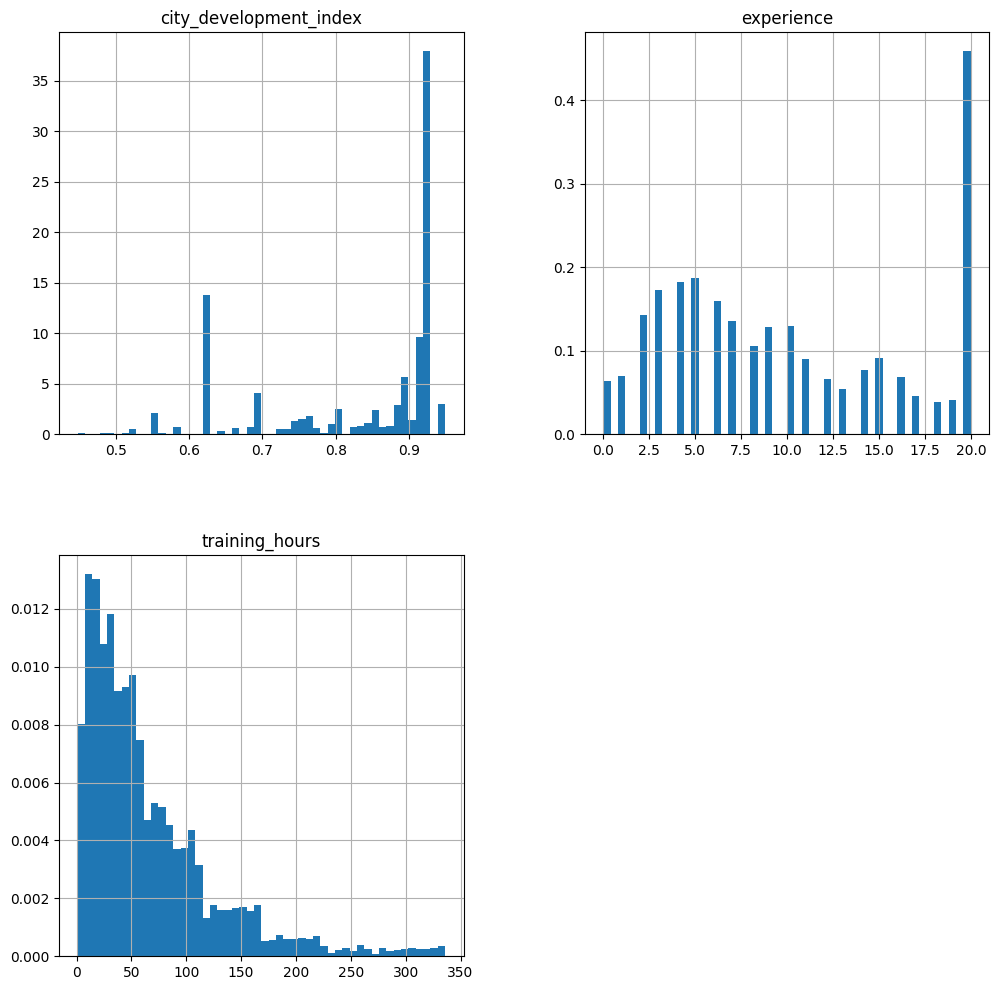

In [45]:
new_df.hist(bins=50,figsize=(12,12),density=True)
plt.show()

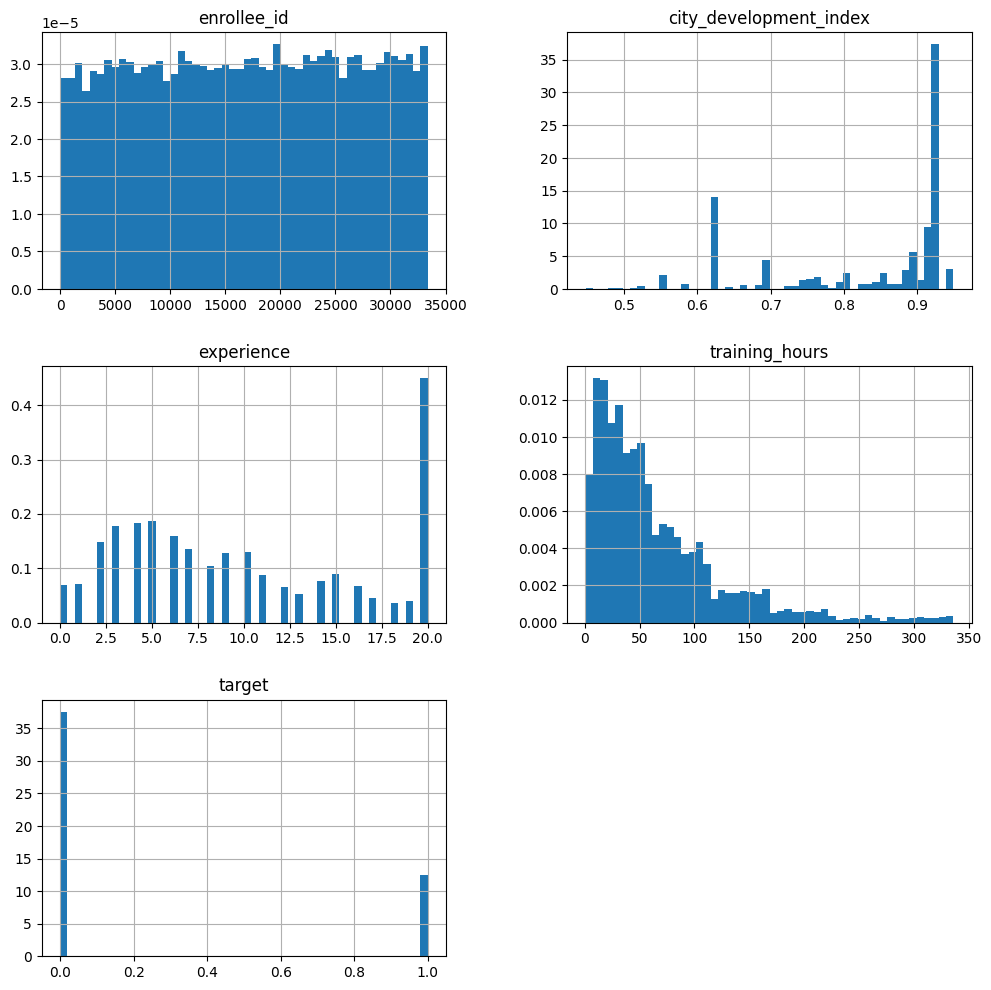

In [46]:
df.hist(bins=50,figsize=(12,12),density=True)
plt.show()

<Axes: >

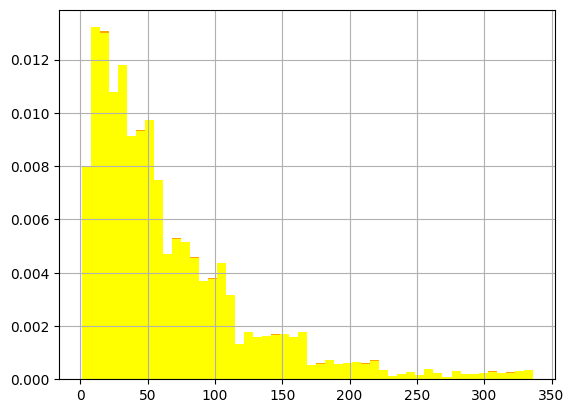

In [50]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['training_hours'].hist(bins=50,density=True, color='orange',ax=ax)



new_df['training_hours'].hist(bins=50, density=True, color='yellow',ax=ax)


<Axes: >

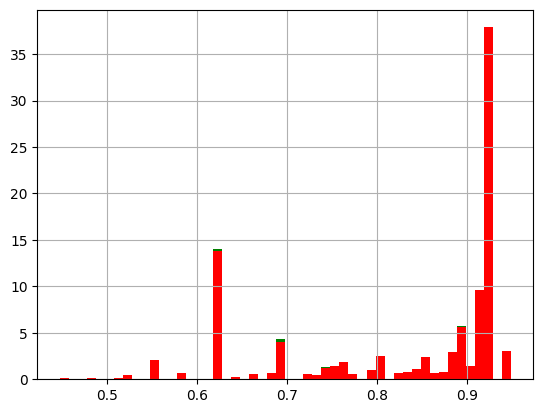

In [52]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['city_development_index'].hist(bins=50,density=True, color='green',ax=ax)



new_df['city_development_index'].hist(bins=50, density=True, color='red',ax=ax)

<Axes: ylabel='Density'>

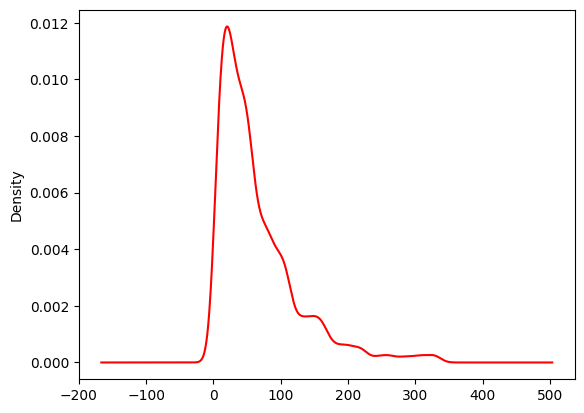

In [61]:
new_df['training_hours'].plot.density(color='red')

<Axes: ylabel='Density'>

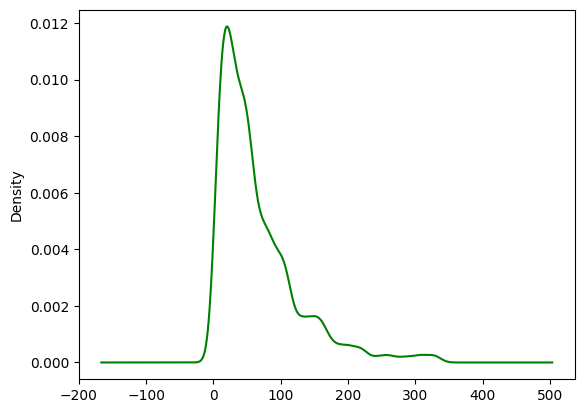

In [62]:
df['training_hours'].plot.density(color='green')

<Axes: >

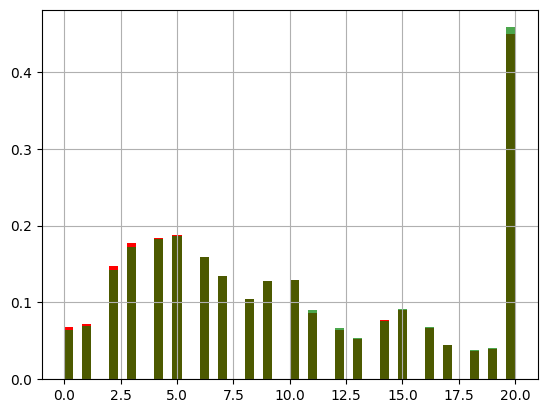

In [68]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['experience'].hist(bins=50, ax=ax, density=True, color='red')

new_df['experience'].hist(bins=50, ax=ax, density=True, color='green',alpha=0.7)




In [72]:
temp = pd.concat([

            df['enrolled_university'].value_counts() / len(df),


            new_df['enrolled_university'].value_counts() / len(new_df)
        ],
        axis=1)

temp.columns=['original','cca']

In [73]:
temp

,original,cca
enrolled_university,,
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [76]:
temp = pd.concat([

            df['education_level'].value_counts() / len(df),


            new_df['education_level'].value_counts() / len(new_df)
        ],
        axis=1)

temp.columns = ['original', 'cca']




temp

,original,cca
education_level,,
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587
